<a href="https://colab.research.google.com/github/mohitrajparit/dsML/blob/main/DL02_faceRecogintion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading the dataset

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import zipfile
# print(os.listdir('/content/drive/MyDrive/yalefaces'))
path='/content/drive/MyDrive/yalefaces'
print(os.listdir(path))


['.DS_Store', 'train', 'test']


##Preprocessing the images

In [40]:
def get_image_data():
  paths=[os.path.join(path+'/train',f) for f in os.listdir(path+'/train')]
  # print(paths)
  faces=[]
  ids=[]
  for pathh in paths:
    image=Image.open(pathh).convert('L')
    # cv2_imshow(np.array(img))
    image_np=np.array(image,'uint8')
    id=int(os.path.split(pathh)[1].split('.')[0].replace('subject',''))
    faces.append(image_np)
    ids.append(id)
  ids=np.array(ids)
  return ids,faces


In [41]:
ids,faces=get_image_data()

In [42]:
print(type(ids),type(faces))
print(len(ids),len(faces))

<class 'numpy.ndarray'> <class 'list'>
135 135


In [43]:
ids

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        5,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,  4])

In [44]:
faces

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 216, 224, 244],
        [255, 255, 255, ..., 215, 220, 245],
        [255, 255, 255, ..., 231, 211, 231],
        ...,
        [255, 255, 255, ..., 192, 197, 203],
        [255, 255, 255, ..., 189, 207, 215],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [45]:
faces[0],faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [46]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

In [47]:
test_image='/content/drive/MyDrive/yalefaces/test/subject10.sad.gif'


In [48]:
lbph_face_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
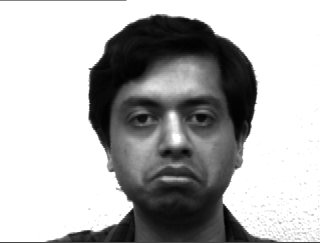

In [49]:
image=Image.open(test_image).convert('L')
image_np=np.array(image,'uint8')
image_np

In [50]:
image_np.shape

(243, 320)

In [51]:
prediction=lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [52]:
prediction[0]

10

In [53]:
expected_output=int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output


10

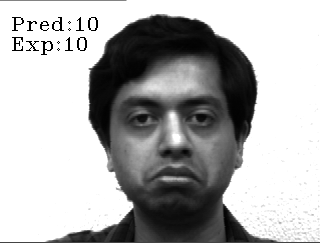

In [54]:
cv.putText(image_np,'Pred:'+str(prediction[0]),(10,30),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv.putText(image_np,'Exp:'+str(expected_output),(10,50),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(image_np)

##Evaluating the face Classifier


In [55]:
paths=[os.path.join(path+'/test',f)for f in os.listdir(path+'/test')]
# print(paths)
predictions=[]
expected_outputs=[]
for pathh in paths:
  image=Image.open(pathh).convert('L')
  image_np=np.array(image,'uint8')
  prediction,_=lbph_face_classifier.predict(image_np)
  expected_output=int(os.path.split(pathh)[1].split('.')[0].replace('subject',''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)


In [56]:
type(predictions),type(expected_outputs)

(list, list)

In [57]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)

In [58]:
type(predictions),type(expected_outputs)

(numpy.ndarray, numpy.ndarray)

In [59]:
predictions

array([ 1,  1,  4,  5,  3,  9,  9,  4,  5,  5,  6, 14,  7,  9,  4,  8,  7,
        9,  4, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15,  7])

In [60]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.6666666666666666

In [62]:
len(predictions)


30

In [63]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(expected_outputs,predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

<Axes: >

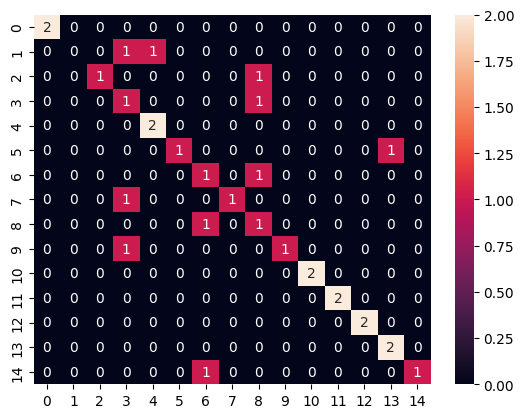

In [64]:
import seaborn as sns
sns.heatmap(cm,annot=True)

##DLIB

In [65]:
import dlib
import cv2 as cv
from google.colab.patches import cv2_imshow

##Detecting facial points

In [66]:
face_detector=dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


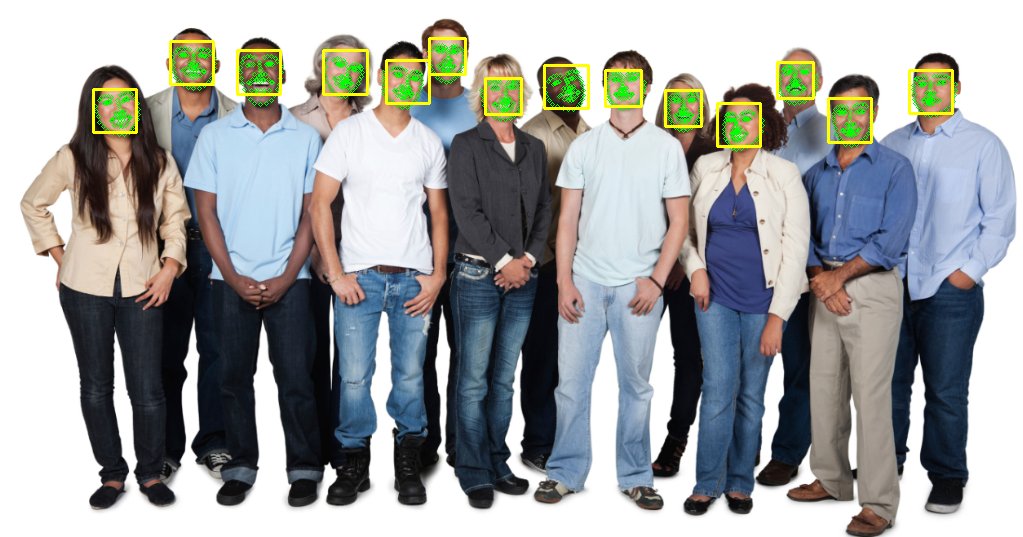

In [35]:
image=cv.imread('people2.jpg')
# image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
# cv2_imshow(image)
face_detection=face_detector(image,1)
for face in face_detection:
  points=points_detector(image,face)
  for point in points.parts():
    cv.circle(image,(point.x,point.y),2,(0,255,0),1)
  l,t,r,b=face.left(),face.top(),face.right(),face.bottom()
  cv.rectangle(image,(l,t),(r,b),(0,255,255),2)
cv2_imshow(image)

In [67]:
import os

In [68]:
face_descripter_extractor=dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [69]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join(path+'/train', f) for f in os.listdir(path+'/train')]
for pathh in paths:
  #print(path)
  image = Image.open(pathh).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)

    face_descriptor = face_descripter_extractor.compute_face_descriptor(image_np, points)
    #print(type(face_descriptor))
    #print(len(face_descriptor))
    #print(face_descriptor)
    face_descriptor = [f for f in face_descriptor]
    #print(face_descriptor)
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    #print(face_descriptor)
    #print(face_descriptor.shape)
    face_descriptor = face_descriptor[np.newaxis, :]
    #print(face_descriptor.shape)
    #print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = pathh
    idx += 1
  #cv2_imshow(image_np)

In [70]:
face_descriptors.shape

(132, 128)

In [71]:
face_descriptors

array([[-0.12307603,  0.15429261,  0.03719164, ..., -0.04480682,
         0.05822597,  0.05217908],
       [-0.15960512,  0.12599677,  0.00484303, ..., -0.00930963,
         0.10940754,  0.08466733],
       [-0.14791992,  0.16302285, -0.01365525, ..., -0.04130839,
         0.02652286,  0.04036881],
       ...,
       [-0.13380437,  0.06383409, -0.02574331, ...,  0.01794565,
         0.0293784 ,  0.07215709],
       [-0.16613585,  0.02577089, -0.01535486, ..., -0.02198657,
         0.07409401,  0.08420548],
       [-0.13881056,  0.0997359 ,  0.05796424, ..., -0.03732805,
         0.13690561, -0.01858421]])

In [72]:
len(index)

132

In [73]:
index

{0: '/content/drive/MyDrive/yalefaces/train/subject01.glasses.gif',
 1: '/content/drive/MyDrive/yalefaces/train/subject01.leftlight.gif',
 2: '/content/drive/MyDrive/yalefaces/train/subject01.noglasses.gif',
 3: '/content/drive/MyDrive/yalefaces/train/subject01.normal.gif',
 4: '/content/drive/MyDrive/yalefaces/train/subject01.sad.gif',
 5: '/content/drive/MyDrive/yalefaces/train/subject01.sleepy.gif',
 6: '/content/drive/MyDrive/yalefaces/train/subject01.surprised.gif',
 7: '/content/drive/MyDrive/yalefaces/train/subject01.wink.gif',
 8: '/content/drive/MyDrive/yalefaces/train/subject02.glasses.gif',
 9: '/content/drive/MyDrive/yalefaces/train/subject02.happy.gif',
 10: '/content/drive/MyDrive/yalefaces/train/subject02.noglasses.gif',
 11: '/content/drive/MyDrive/yalefaces/train/subject02.normal.gif',
 12: '/content/drive/MyDrive/yalefaces/train/subject02.rightlight.gif',
 13: '/content/drive/MyDrive/yalefaces/train/subject02.sleepy.gif',
 14: '/content/drive/MyDrive/yalefaces/train/s

In [74]:
np.linalg.norm(face_descriptors[129] - face_descriptors[130])

0.45545780801562624

In [75]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1))

2

In [76]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)

array([0.50784066, 0.42630834, 0.42523865, 0.49062277, 0.51342063,
       0.53196637, 0.56026277, 0.64546157, 0.71203298, 0.64394351,
       0.64394351, 0.62791778, 0.65244518, 0.65121562, 0.66494472,
       0.69290898, 0.78224739, 0.75727153, 0.75894477, 0.75894477,
       0.78576582, 0.75590364, 0.73202458, 0.71386306, 0.73413234,
       0.89752292, 0.82464707, 0.79584041, 0.84394889, 0.83921431,
       0.85722717, 0.865294  , 0.69236223, 0.82774315, 0.74783537,
       0.71776436, 0.70091731, 0.72964901, 0.75288689, 0.71601199,
       0.7287896 , 0.7600171 , 0.71714426, 0.79762717, 0.79762717,
       0.8320144 , 0.7626123 , 0.76996189, 0.77587475, 0.77188027,
       0.74429972, 0.84889175, 0.86814434, 0.86762231, 0.86814434,
       0.84179263, 0.8482741 , 0.82435089, 0.77751387, 0.78265542,
       0.78690968, 0.75007819, 0.79965424, 0.88586838, 0.79735243,
       0.7126481 , 0.82817114, 0.76670968, 0.73047919, 0.67167048,
       0.75290046, 0.72093897, 0.76069191, 0.72093897, 0.71640

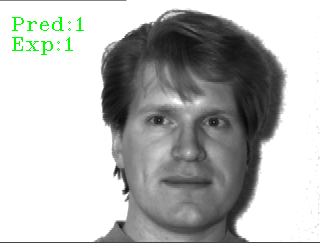

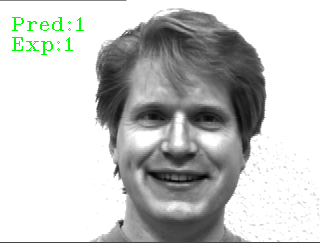

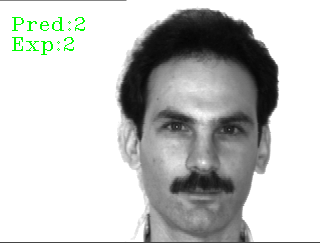

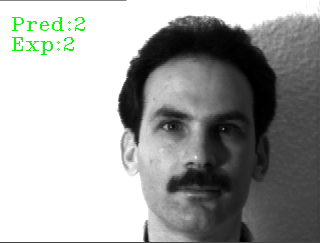

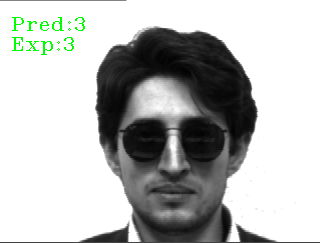

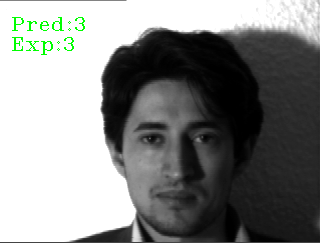

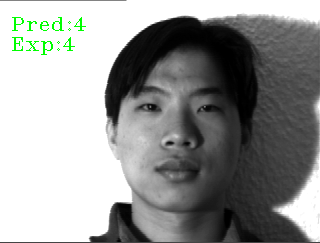

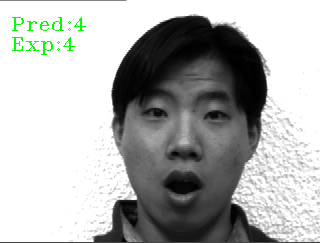

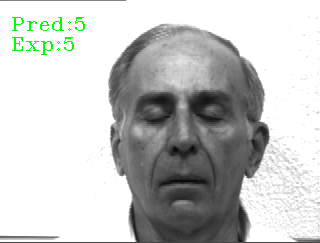

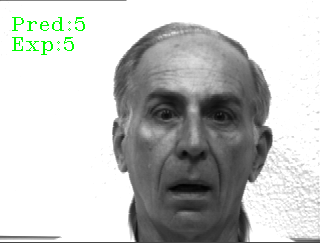

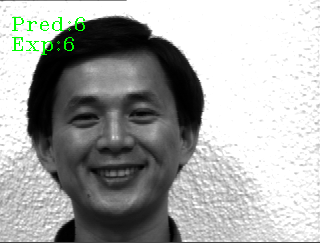

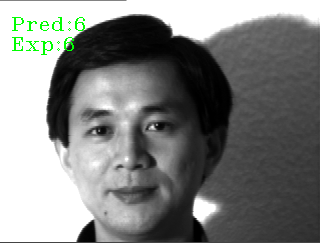

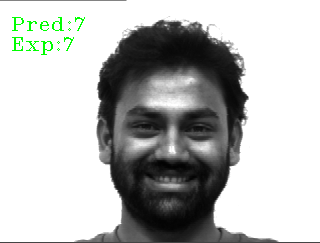

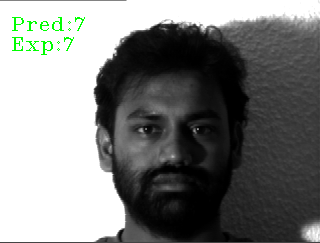

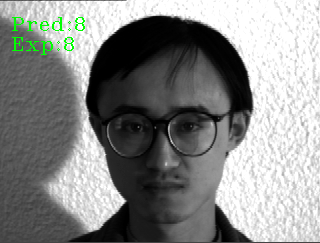

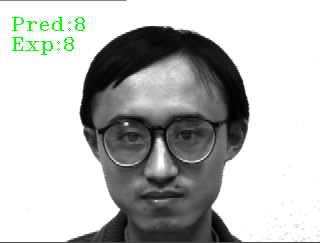

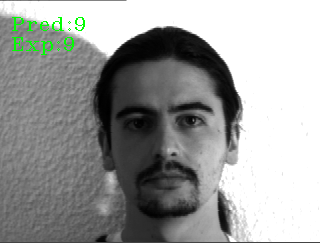

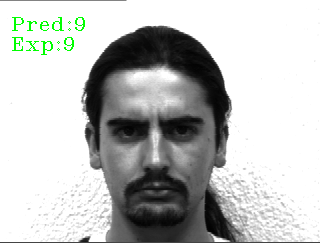

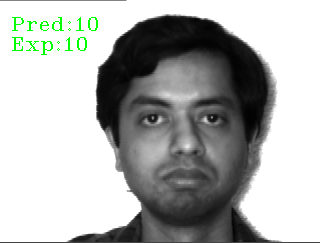

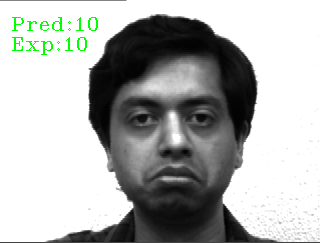

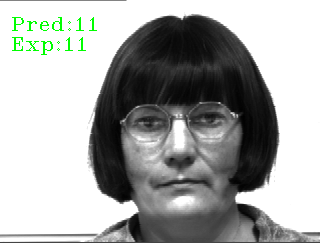

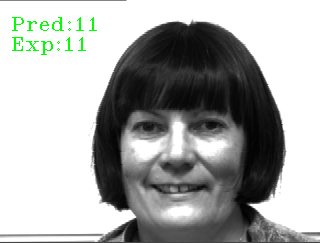

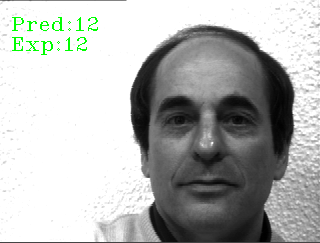

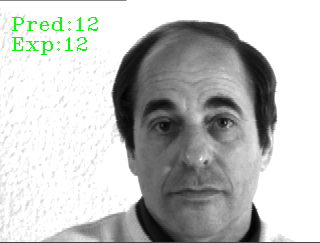

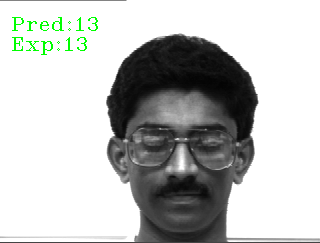

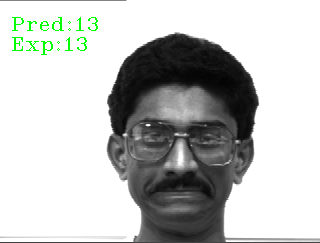

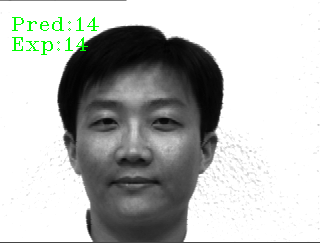

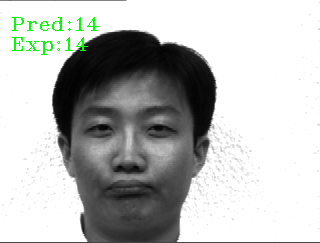

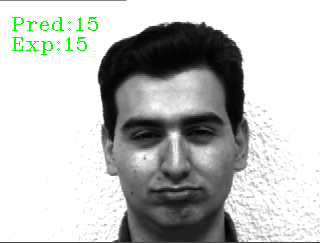

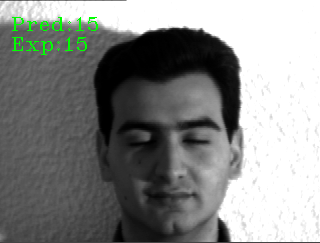

In [78]:
threshold=0.5
predictions=[]
expected_outputs=[]

paths=[os.path.join(path+'/test',f)for f in os.listdir(path+'/test')]
for pathh in paths:
  image=Image.open(pathh).convert('RGB')
  image_np=np.array(image,'uint8')
  face_detection=face_detector(image_np,1)
  for face in face_detection:
    points=points_detector(image_np,face)
    face_descriptor=face_descripter_extractor.compute_face_descriptor(image_np,points)
    face_descriptor=[f for f in face_descriptor]
    face_descriptor=np.asarray(face_descriptor,dtype=np.float64)
    face_descriptor=face_descriptor[np.newaxis,:]

    distances=np.linalg.norm(face_descriptors-face_descriptor,axis=1)
    min_index=np.argmin(distances)
    min_distance=distances[min_index]

    if min_distance <= threshold:
      name_pred=int(os.path.split(index[min_index])[1].split('.')[0].replace('subject',''))
    else:
      name_pred='Unknown'
    expected_output=int(os.path.split(pathh)[1].split('.')[0].replace('subject',''))
    predictions.append(name_pred)
    expected_outputs.append(expected_output)

    cv.putText(image_np,'Pred:'+str(name_pred),(10,30),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
    cv.putText(image_np,'Exp:'+str(expected_output),(10,50),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
  cv2_imshow(image_np)


In [80]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)
predictions,expected_outputs


(array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
         9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]),
 array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
         9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]))

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0